<h2>Import libs</h2>


In [81]:
# import libs
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import seaborn as sns
import joblib
from collections import Counter
import pandas as pd
import numpy as np

<h2>Helper functions</h2>

In [ ]:
def create_word_cloud(d:dict):
  """
  create a word cloud from a given dict based on the words frequncies
  """
  plt.figure(figsize=(15, 15), dpi=80)
  wordcloud = WordCloud(background_color='turquoise', colormap='inferno', prefer_horizontal=1)
  wordcloud.generate_from_frequencies(frequencies=d)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

In [ ]:
def most_commons_word_barplot(x,y,hue,df,title):
  plt.figure(figsize=(16, 15))
  ax = sns.barplot(x = x, y = y, hue = hue, data = df)
  ax.set_yscale('log')
  plt.title(title)
  # Show the plot
  plt.show()

<h2>Load language models</h2>

In [ ]:
# load language models
languageModelByTokens = joblib.load("../LanguageModels/languageModelByTokens.pkl")
languageModelByTerms = joblib.load("../LanguageModels/languageModelByTerms.pkl")

<h2>General statisitcs<h2>

In [96]:
print("Tokens model length {}".format(len(languageModelByTokens)))
print("Terms model length {}".format(len(languageModelByTerms)))
print("Tokens model length is greater by {:.2f}% from the Terms model length".format(((len(languageModelByTokens)/len(languageModelByTerms))-1)*100))
tokens_values = [float(x) for x in languageModelByTokens.values()]
terms_values = [float(x) for x in languageModelByTerms.values()]
print("Average frequency of the Tokens model is {:.8f}".format(np.average(tokens_values)))
print("Average frequency of the Terms model is {:.8f}".format(np.average(terms_values)))

Tokens model length 53176
Terms model length 30081
Tokens model length is greater by 76.78% from the Terms model length
Average frequency of the Tokens model is 0.00021528
Average frequency of the Terms model is 0.00005577


<h2>Generate word clouds<h2>

Word cloud for token model


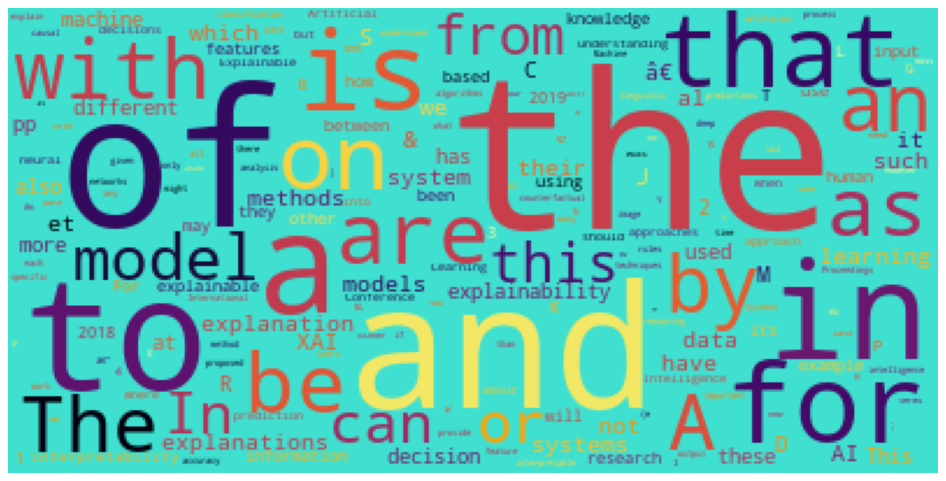

In [ ]:
print("Word cloud for token model")
create_word_cloud(d=languageModelByTokens)

Word cloud for terms model


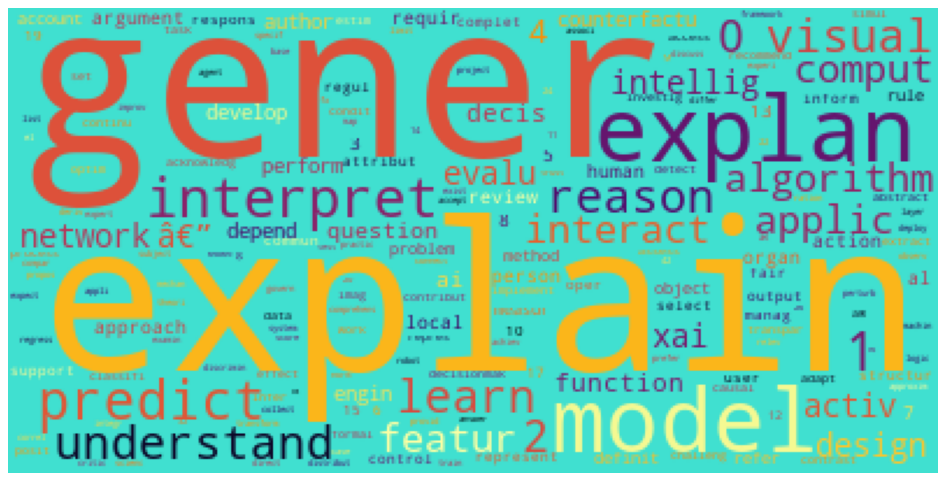

In [ ]:
print("Word cloud for terms model")
create_word_cloud(d=languageModelByTerms)

We can see that the most frequent terms in the token model are stop words as excepted.<br>
Those words include for example: 'of', 'the', 'to' and 'and'. Those words are meaningless for indentifying docs in the collection because<br>
they are frequent in every one of them.<br>
In the terms model we can see that the most common terms are more related<br>
to our query "Artificial Intelligence Explainability" and include:
'explain', 'model', 'intellig'. Also we can see that those terms
are not actuall words but the results of linguistic processing on real words.<br>
Those words can help us indentify docs that are related to the collection.

<h2>Bar plot of the 10 most frequent words by model</h2>

In [ ]:
tokens_models_counter = Counter(languageModelByTokens)
terms_models_counter = Counter(languageModelByTerms)

In [ ]:
tokens_most_common_10 = tokens_models_counter.most_common(10)
terms_most_common_10 = terms_models_counter.most_common(10)

In [ ]:
most_commons_df = pd.DataFrame(columns=['term', 'frequency','model'])

In [ ]:
most_common_list = []

for pair_tokens, pair_terms in zip(tokens_most_common_10, terms_most_common_10):
  most_common_list.append({'term':pair_tokens[0], 'frequency':pair_tokens[1],'model':"Token model"})
  most_common_list.append({'term':pair_terms[0], 'frequency':pair_terms[1],'model':"Terms model"})

In [ ]:
for row in most_common_list:
    most_commons_df.loc[len(most_commons_df)] = row

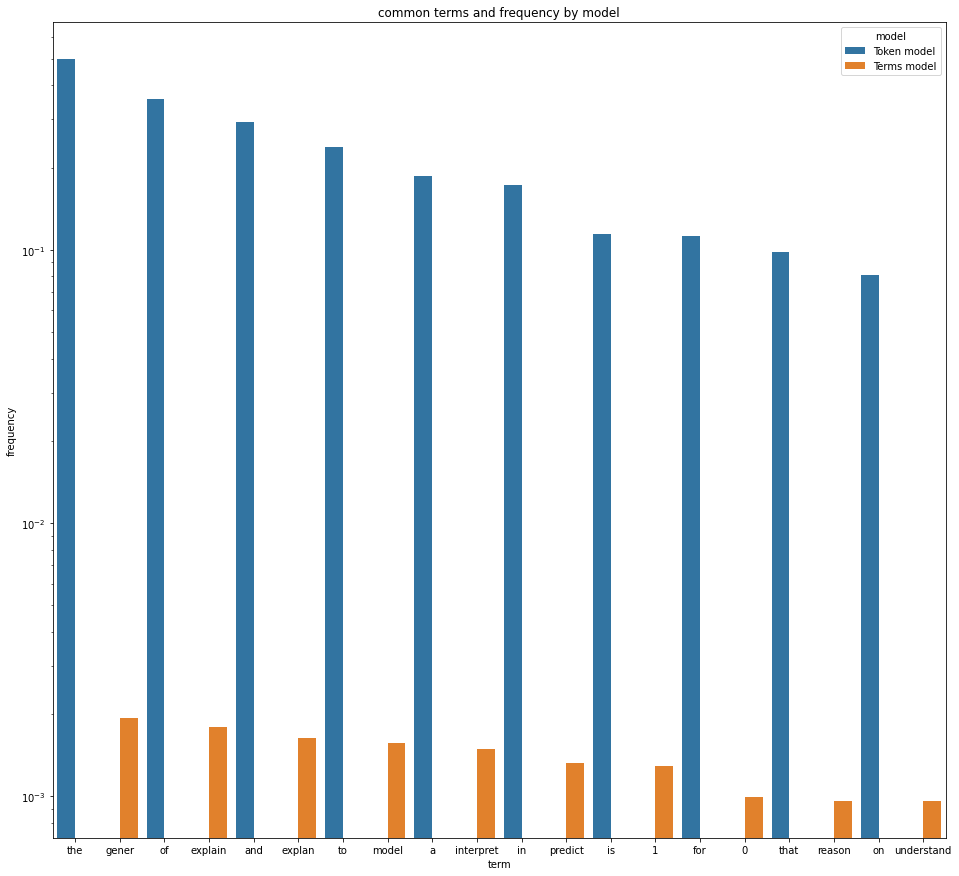

In [ ]:
most_commons_word_barplot(x="term",y="frequency",hue="model", df= most_commons_df, title="common terms and frequency by model")

Here we can see a bar plot of the log of frequency of the 10 most common terms in both models.<br>
We can see that the frequencies of the terms in the terms model are<br>
significantly lower then those from the tokens model, we can explain that<br>
by the fact that the most common words in the token models are stop words<br> that are highly frequenct, on the other hand the common words<br>
in the term model are highly frequent in the topic but rare in the vocabulary. Therefore they good for indentify document that are related to the query topic.<br>